# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



In [1]:
SEED = 42

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('task 1.csv')
train_df.head()

,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13


In [4]:
train_df.user_id.value_counts()

0      400
55     131
82     127
148    122
120    121
      ... 
124     84
145     83
170     82
42      82
152     77
Name: user_id, Length: 200, dtype: int64

## Preprocessing
I decided to consider this task as a binary classification problem.

In [5]:
train_df['is_waldo'] = (train_df.user_id == 0).astype(np.int8)
train_df.head()

,index,browser,os,locale,user_id,location,sites,time,date,is_waldo
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28,0
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26,0
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13,0
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19,0
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13,0


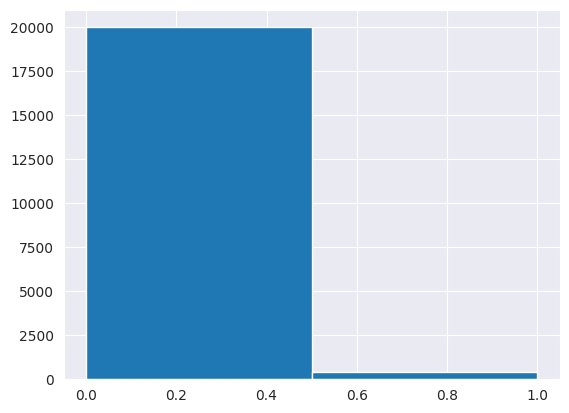

In [6]:
train_df.is_waldo.hist(bins=2)
plt.show()

We can see significant class imbalance on the plot above.

In [35]:
X = train_df.drop(columns=['user_id', 'index', 'sites', 'is_waldo', 'date'])
X.time = pd.to_datetime(X.time).to_numpy().reshape((-1, 1))
X['weekday'] = pd.to_datetime(train_df.date).apply(lambda x: x.weekday()).to_numpy().reshape((-1, 1))
X['total_time'] = train_df.sites.apply(lambda x: sum(s['length'] for s in eval(x)))

In [36]:
y = train_df.is_waldo.astype(np.float32)

In [37]:
X.head()

,browser,os,locale,location,time,weekday,total_time
0,Firefox,Windows 10,zh-CN,China/Shanghai,2023-04-08 14:14:00,3,117
1,Internet Explorer,Windows 8,ro-RO,Germany/Berlin,2023-04-08 05:23:00,4,1559
2,Internet Explorer,MacOS,ur-PK,Australia/Sydney,2023-04-08 12:03:00,6,313
3,Internet Explorer,Ubuntu,pl-PL,Japan/Tokyo,2023-04-08 06:08:00,3,451
4,Internet Explorer,Windows 8,bg-BG,Japan/Tokyo,2023-04-08 03:59:00,5,164


In [38]:
tmp = pd.concat([X, y], axis=1)
tmp.head()

,browser,os,locale,location,time,weekday,total_time,is_waldo
0,Firefox,Windows 10,zh-CN,China/Shanghai,2023-04-08 14:14:00,3,117,0.0
1,Internet Explorer,Windows 8,ro-RO,Germany/Berlin,2023-04-08 05:23:00,4,1559,0.0
2,Internet Explorer,MacOS,ur-PK,Australia/Sydney,2023-04-08 12:03:00,6,313,0.0
3,Internet Explorer,Ubuntu,pl-PL,Japan/Tokyo,2023-04-08 06:08:00,3,451,0.0
4,Internet Explorer,Windows 8,bg-BG,Japan/Tokyo,2023-04-08 03:59:00,5,164,0.0


## Looking at features

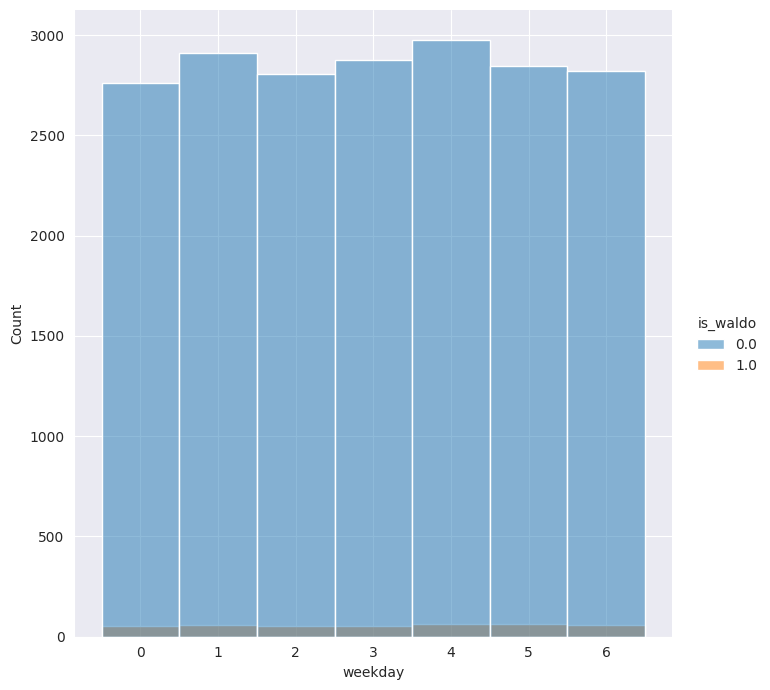

In [28]:
import seaborn as sns
sns.displot(tmp, x="weekday", hue="is_waldo", discrete=True, height=7)
plt.show()

The feature above is not informative: both classes has uniform distribution of weekdays.

In [70]:
X = X.drop(columns=["weekday"])

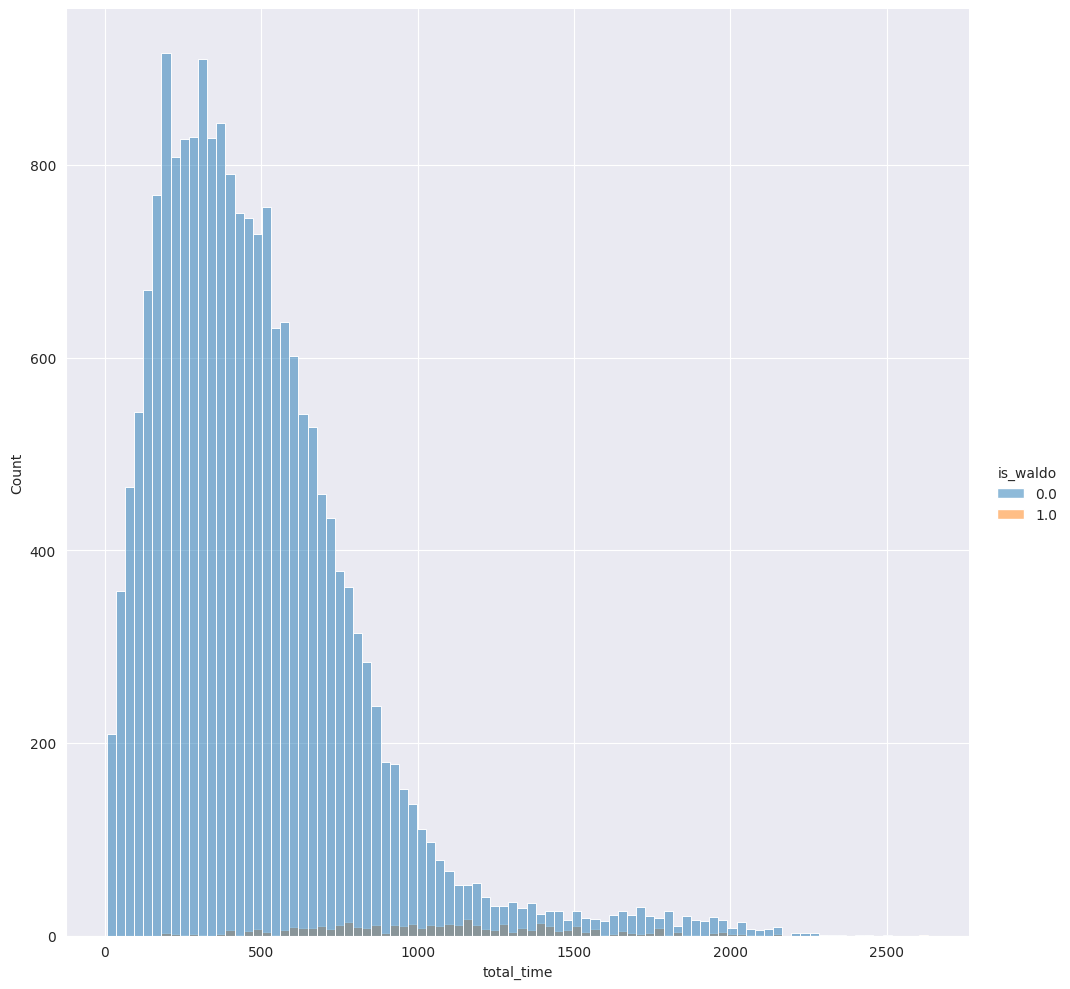

In [46]:
sns.displot(tmp, x="total_time", hue="is_waldo", height=10)
plt.show()

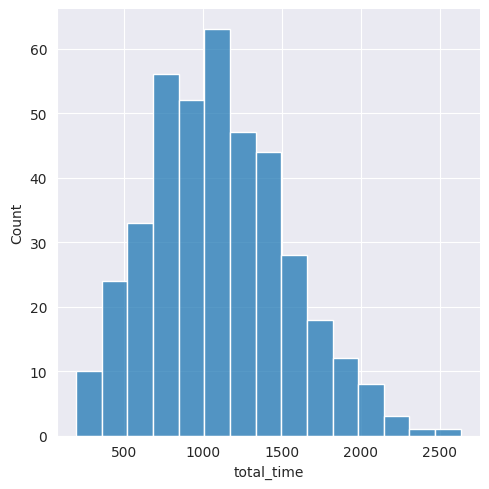

In [47]:
sns.displot(tmp[tmp.is_waldo == 1], x="total_time")
plt.show()

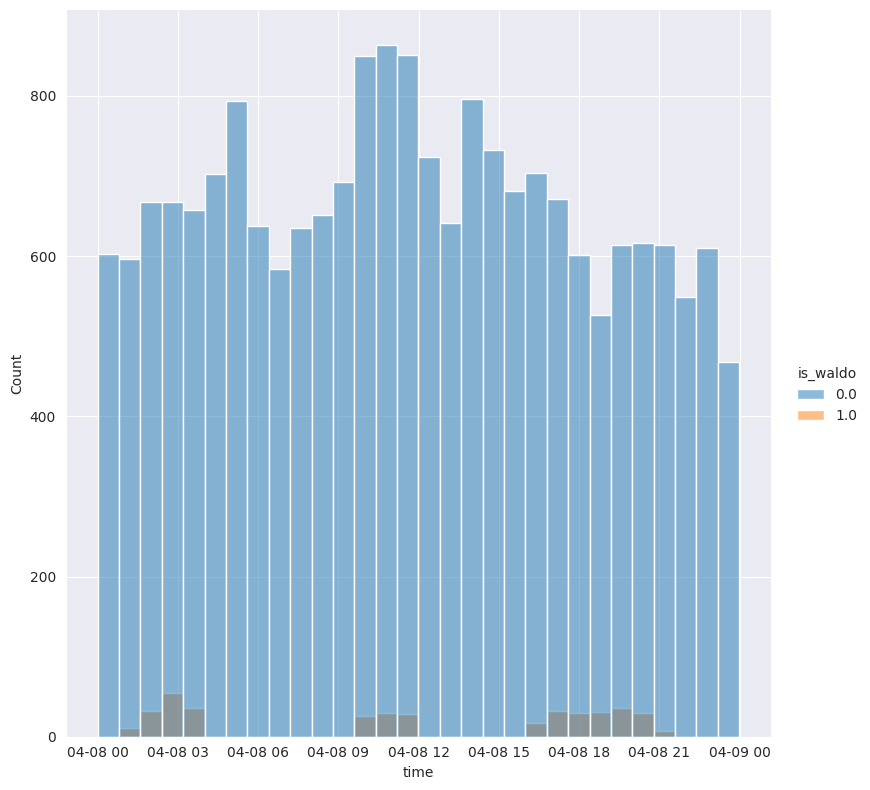

In [48]:
sns.displot(tmp, x="time", hue="is_waldo", height=8)
plt.show()

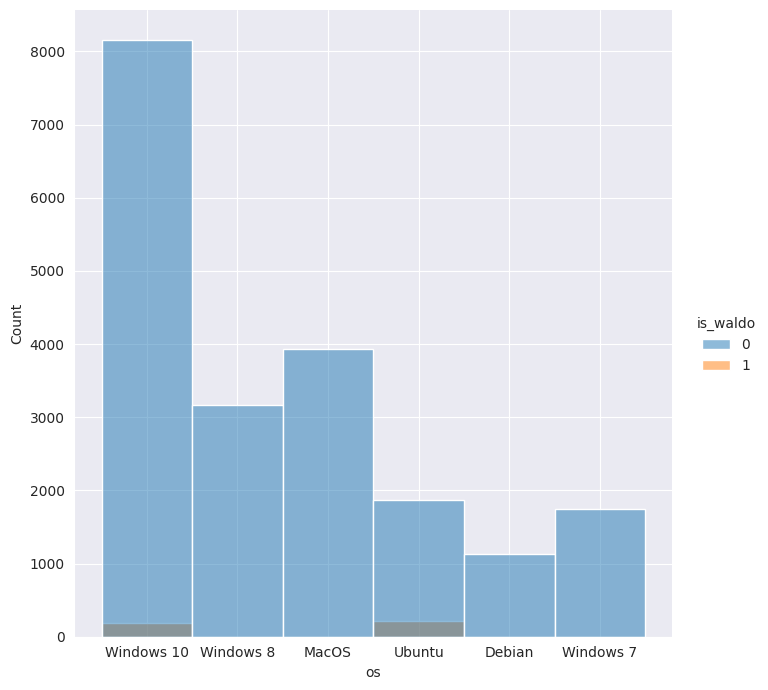

In [45]:
sns.displot(train_df, x="os", hue="is_waldo", height=7)
plt.show()

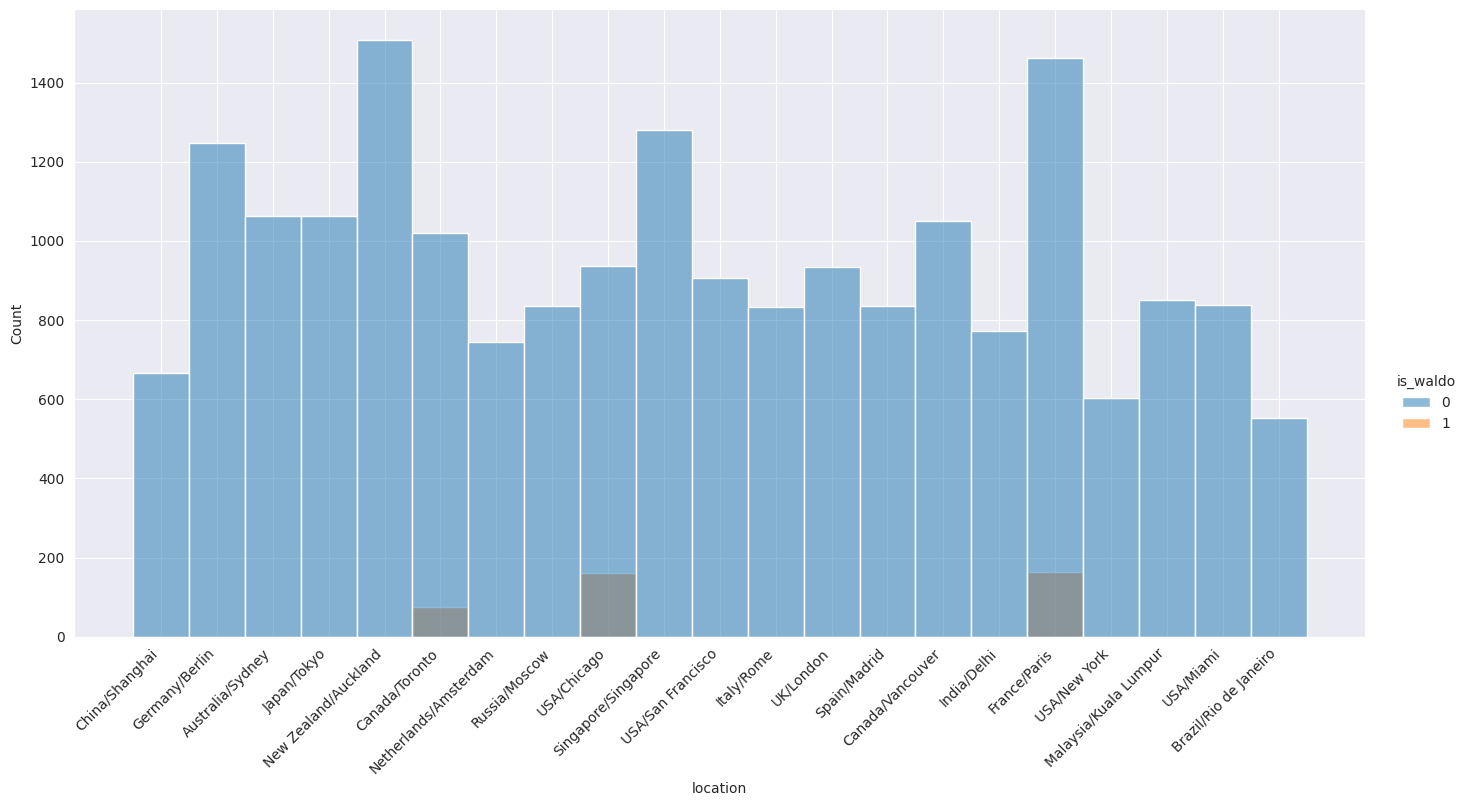

In [67]:
sns.displot(train_df, x="location", hue="is_waldo", height=7, aspect=2, discrete=True)

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

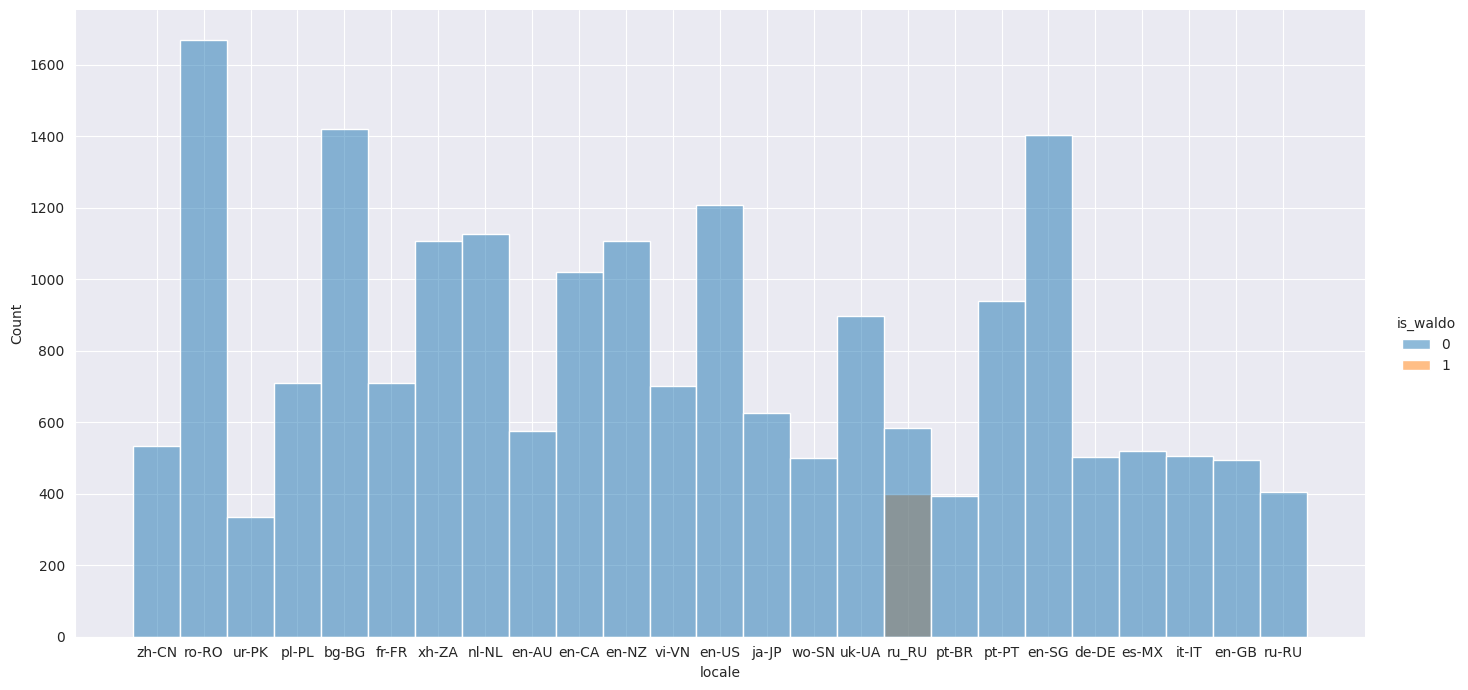

In [69]:
sns.displot(train_df, x="locale", hue="is_waldo", height=7, aspect=2, discrete=True)
plt.show()

## Splitting & balancing

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [72]:
from sklearn.utils import resample

is_waldo_filter = y_train == 1

# separate majority and minority classes
X_train_majority = X_train[~is_waldo_filter]
X_train_minority = X_train[is_waldo_filter]

y_train_majority = y_train[~is_waldo_filter]
y_train_minority = y_train[is_waldo_filter]

# Upsample minority class
X_train_minority_upsampled = resample(
    X_train_minority,
    replace=True,
    n_samples=len(X_train_majority),
    random_state=SEED
)

y_train_minority_upsampled = resample(
    y_train_minority,
    replace=True,
    n_samples=len(y_train_majority),
    random_state=SEED
)

# Combine majority class with upsampled minority class
X_train_balanced = pd.concat([X_train_majority, X_train_minority_upsampled])
y_train_balanced = pd.concat([y_train_majority, y_train_minority_upsampled])

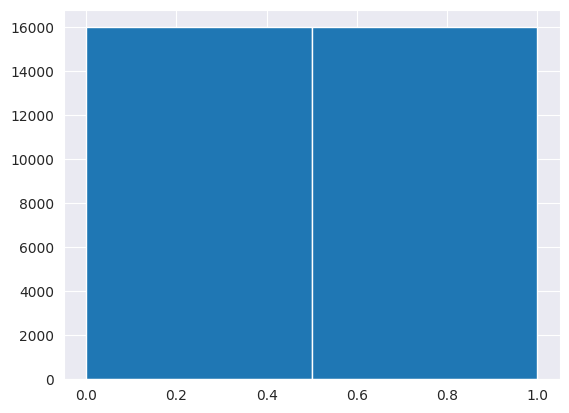

In [74]:
y_train_balanced.hist(bins=2)
plt.show()

## Model training

In [75]:
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from skorch import NeuralNetBinaryClassifier
from sklearn.compose import ColumnTransformer

torch.manual_seed(SEED)

NUM_NEURONS = 64
NUM_HIDDEN_LAYERS = 0

In [82]:
class CustomModel(nn.Module):
    def __init__(self, num_neurons=NUM_NEURONS, num_layers=NUM_HIDDEN_LAYERS, input_dims=58):
        super(CustomModel, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dims, num_neurons))
        for _ in range(num_layers):
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Linear(num_neurons, num_neurons))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(num_neurons, 1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [83]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [84]:
net = NeuralNetBinaryClassifier(
    CustomModel, max_epochs=20, optimizer=torch.optim.Adam, lr=0.01,
    device=device, batch_size=X_train.shape[0]
)

num_cols_filter = X_train.columns.isin(('time', 'total_time'))
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(dtype=np.float32), X_train.columns[~num_cols_filter]),
    ('time_scaler', StandardScaler(), ('time',)),
    ('length_scaler', StandardScaler(), ('total_time',))
])

def to_float32(x):
  return x.astype(np.float32)

fun_tr = FunctionTransformer(to_float32)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_float', fun_tr),
    ('net', net)
])

In [85]:
pipeline.fit(X_train_balanced, y_train_balanced)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6944       0.9555        0.6266  2.3392
      2        0.6132       0.9856        0.5603  1.8661
      3        0.5446       0.9788        0.4873  2.1954
      4        0.4708       0.9764        0.4086  1.8746
      5        0.3928       0.9761        0.3292  1.8650
      6        0.3155       0.9770        0.2557  1.8717
      7        0.2450       0.9784        0.1934  1.8546
      8        0.1854       0.9802        0.1444  1.8581
      9        0.1385       0.9814        0.1081  2.1535
     10        0.1036       0.9828        0.0823  1.8771
     11        0.0785       0.9847        0.0642  1.8659
     12        0.0609       0.9866        0.0514  1.8993
     13        0.0484       0.9883        0.0422  1.9238
     14        0.0395       0.9900        0.0353  1.9514
     15        0.0330       0.9906        0.0301  1.9249
     16        0.0281       0.9

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(dtype=<class 'numpy.float32'>),
                                                  Index(['browser', 'os', 'locale', 'location'], dtype='object')),
                                                 ('time_scaler',
                                                  StandardScaler(), ('time',)),
                                                 ('length_scaler',
                                                  StandardScaler(),
                                                  ('total_time',))])),
                ('to_float',
                 FunctionTransformer(func=<function to_float32 at 0x7f1e3989ab60>)),
                ('net',
                 <class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=CustomModel(
    (layers): ModuleList(
      (0): Linear(in_features=58, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  ),
))])

In [86]:
from sklearn.model_selection import GridSearchCV

net.set_params(train_split=False, verbose=0)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_float', fun_tr),
    ('net', net)
])

params = {
    'net__module__num_neurons': [32, 64, 128],
    'net__module__num_layers': [0, 1]
}

gs = GridSearchCV(pipeline, params, cv=3, scoring='f1_macro', verbose=3, n_jobs=2)

In [87]:
gs.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END net__module__num_layers=0, net__module__num_neurons=32;, score=0.989 total time=  27.7s
[CV 2/3] END net__module__num_layers=0, net__module__num_neurons=32;, score=0.992 total time=  28.5s
[CV 3/3] END net__module__num_layers=0, net__module__num_neurons=32;, score=0.994 total time=  27.6s
[CV 1/3] END net__module__num_layers=0, net__module__num_neurons=64;, score=0.996 total time=  27.2s
[CV 2/3] END net__module__num_layers=0, net__module__num_neurons=64;, score=0.996 total time=  27.0s
[CV 3/3] END net__module__num_layers=0, net__module__num_neurons=64;, score=0.996 total time=  26.8s
[CV 1/3] END net__module__num_layers=0, net__module__num_neurons=128;, score=0.997 total time=  27.3s
[CV 2/3] END net__module__num_layers=0, net__module__num_neurons=128;, score=0.997 total time=  28.0s
[CV 3/3] END net__module__num_layers=0, net__module__num_neurons=128;, score=0.998 total time=  26.2s
[CV 1/3] END net__module__nu

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(dtype=<class 'numpy.float32'>),
                                                                         Index(['browser', 'os', 'locale', 'location'], dtype='object')),
                                                                        ('time_scaler',
                                                                         StandardScaler(),
                                                                         ('time',)),
                                                                        ('length_scaler',
                                                                         StandardScaler(),
                                                                         ('total_time',))])),
                                       ('to_float',
                                        FunctionTransformer(func=<function...
                                       ('net',
                                        <class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=CustomModel(
    (layers): ModuleList(
      (0): Linear(in_features=58, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  ),
))]),
             n_jobs=2,
             param_grid={'net__module__num_layers': [0, 1],
                         'net__module__num_neurons': [32, 64, 128]},
             scoring='f1_macro', verbose=3)

In [88]:
gs.best_score_, gs.best_params_

(0.9995000037658772,
 {'net__module__num_layers': 1, 'net__module__num_neurons': 128})

## Evaluation on the test set

In [89]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(np.unique(y_pred, return_counts=True))
print(classification_report(y_test, y_pred, zero_division=0))

(array([0, 1], dtype=uint8), array([3967,  114]))
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4001
         1.0       0.70      1.00      0.82        80

    accuracy                           0.99      4081
   macro avg       0.85      1.00      0.91      4081
weighted avg       0.99      0.99      0.99      4081



In [90]:
from sklearn.metrics import classification_report

y_pred = gs.predict(X_test)
print(np.unique(y_pred, return_counts=True))
print(classification_report(y_test, y_pred, zero_division=0))

(array([0, 1], dtype=uint8), array([3988,   93]))
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4001
         1.0       0.86      1.00      0.92        80

    accuracy                           1.00      4081
   macro avg       0.93      1.00      0.96      4081
weighted avg       1.00      1.00      1.00      4081



## Making predictions

In [93]:
test_df = pd.read_csv('task_1_verify.csv')
X = test_df.drop(columns=['sites', 'date'])
X.time = pd.to_datetime(X.time).to_numpy().reshape((-1, 1))
X['total_time'] = test_df.sites.apply(lambda x: sum(s['length'] for s in eval(x)))
X.head()

,browser,os,locale,location,time,total_time
0,Firefox,Windows 7,xh-ZA,USA/New York,2023-04-08 11:30:00,94
1,Chrome,Windows 10,pl-PL,Japan/Tokyo,2023-04-08 14:35:00,716
2,Firefox,Debian,vi-VN,France/Paris,2023-04-08 14:31:00,679
3,Firefox,Debian,en-US,Canada/Vancouver,2023-04-08 10:55:00,222
4,Firefox,Debian,en-CA,Australia/Sydney,2023-04-08 03:30:00,850


In [94]:
for i, is_waldo in enumerate(gs.predict(X)):
    print(f'{i}: {is_waldo}')

0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 1
32: 1
33: 1
34: 1
35: 1


### Questions
1. Did you find any useful insights from your data analysis?
    - I inspected distribution of classes to decide which metric and preprocess techniques should be used. Also, `displot` helped me with investigation of feature distribution over classes and then choose features.
2. What preprocessing techniques did you use? Why?
    - For string columns (`locale`, `os`, `browser`, `location`) I used One-Hot encoder because there was many repeating values and One-Hot encoder do not create order in data like `LabelEncoder`. Also, I converted `time` column to the `datetime`. Then I scaled this column because the neural network cannot work with raw `datetime` and to improve convergence of ANN. Later I encountered the following problem: model was giving biased predictions due to significant class imbalance - it classified all the entries from test sample as 'is not Waldo'. So I decided to make the dataset balanced using `resample` method from `sklearn`.
3. Describe the fine-tuning process and how you reached your model architecture.
    - I used `skorch` wrapper for my ANN to find best number of neurons and layers using grid search. However, `skorch` library made my model train much slower even on GPU. So manually trying different hyperparameters might be faster approach in this task.
4. Which metric did you try to optimize for this task? Why?
    - I used BCELoss for model training because this loss function is suitable for binary classification. For model evaluation I used F1 macro score due to class imbalance. Also, using accuracy score is suitable during model training thanks to dataset resampling.

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
[Download link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [ ]:
# TODO: Implement task 2

### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*
4. What techniques did you use to improve model’s performance other than data augmentation
    - *Answer*

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [99]:
import pandas as pd
train_df = pd.read_csv('loan_data.csv')
train_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [100]:
train_df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

<AxesSubplot: >

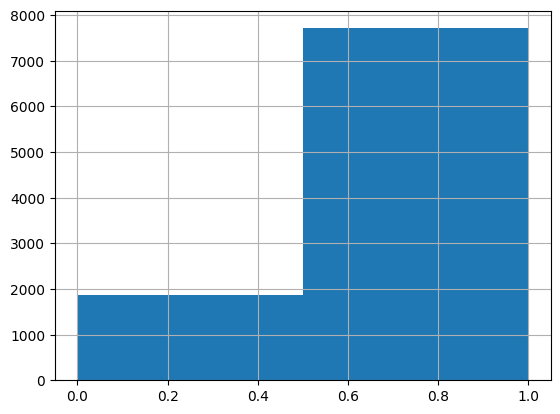

In [101]:
train_df['credit.policy'].hist(bins=2)

In [102]:
from sklearn.preprocessing import OrdinalEncoder

purpose_encoder = OrdinalEncoder()
purpose_encoder.fit(train_df.purpose.to_numpy().reshape(-1, 1))

OrdinalEncoder()

In [104]:
X = pd.get_dummies(train_df.drop(columns=['credit.policy']), columns=['purpose'], drop_first=True)
# X.purpose = purpose_encoder.transform(X.purpose.to_numpy().reshape(-1, 1))
y = train_df['credit.policy']
X.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier(random_state=SEED)

dt_clf.fit(X_train, y_train)

print(classification_report(y_test, dt_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9732    0.9706    0.9719       374
           1     0.9929    0.9935    0.9932      1542

    accuracy                         0.9890      1916
   macro avg     0.9830    0.9821    0.9825      1916
weighted avg     0.9890    0.9890    0.9890      1916



In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=SEED)

rf_clf.fit(X_train, y_train)

print(classification_report(y_test, rf_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9889    0.9492    0.9686       374
           1     0.9878    0.9974    0.9926      1542

    accuracy                         0.9880      1916
   macro avg     0.9883    0.9733    0.9806      1916
weighted avg     0.9880    0.9880    0.9879      1916



## Trying again but with balanced dataset

In [113]:
from sklearn.utils import resample

credit_policy_filter = y_train == 1

# separate majority and minority classes
X_train_majority = X_train[credit_policy_filter]
X_train_minority = X_train[~credit_policy_filter]

y_train_majority = y_train[credit_policy_filter]
y_train_minority = y_train[~credit_policy_filter]

# Upsample minority class
X_train_minority_upsampled = resample(
    X_train_minority,
    replace=True,
    n_samples=len(X_train_majority),
    random_state=SEED
)

y_train_minority_upsampled = resample(
    y_train_minority,
    replace=True,
    n_samples=len(y_train_majority),
    random_state=SEED
)

# Combine majority class with upsampled minority class
X_train_balanced = pd.concat([X_train_majority, X_train_minority_upsampled])
y_train_balanced = pd.concat([y_train_majority, y_train_minority_upsampled])

<AxesSubplot: >

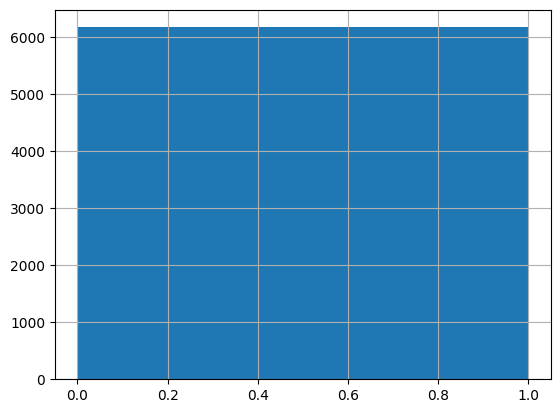

In [114]:
y_train_balanced.hist(bins=2)

In [24]:
dt_clf = DecisionTreeClassifier(random_state=SEED)
dt_clf.fit(X_train_balanced, y_train_balanced)

print(classification_report(y_test, dt_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9809    0.9626    0.9717       374
           1     0.9910    0.9955    0.9932      1542

    accuracy                         0.9890      1916
   macro avg     0.9859    0.9790    0.9824      1916
weighted avg     0.9890    0.9890    0.9890      1916



In [25]:
rf_clf = RandomForestClassifier(random_state=SEED)
rf_clf.fit(X_train_balanced, y_train_balanced)

print(classification_report(y_test, rf_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9863    0.9626    0.9743       374
           1     0.9910    0.9968    0.9939      1542

    accuracy                         0.9901      1916
   macro avg     0.9886    0.9797    0.9841      1916
weighted avg     0.9901    0.9901    0.9900      1916



As we can see, resampling did not make too much of a difference with default classifier parameters (but slightly improved RF performance). Let us use grid search to fine tune DT and RF and compare their performance.

gridsearchcv makes DT perform much worse!!! Why???

In [115]:
from sklearn.model_selection import GridSearchCV
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=SEED)
rf_clf = RandomForestClassifier(random_state=SEED)

# Define parameter grids
dt_param_grid = {
    # "max_depth": np.arange(1, 50, 2, dtype=np.int8),
    "criterion": ["gini", "entropy"],
    "min_samples_split": np.arange(2, 11, dtype=np.int8),
    "min_samples_leaf": np.arange(1, 11, dtype=np.int8),
    "max_features": ["sqrt", "log2"]
}
rf_param_grid = dict(**{"n_estimators": [10, 50, 100, 200]}, **dt_param_grid)

# Define grid search objects
dt_grid = GridSearchCV(dt_clf, param_grid=dt_param_grid, cv=5, scoring="f1_macro", n_jobs=8, verbose=1)
rf_grid = GridSearchCV(rf_clf, param_grid=rf_param_grid, cv=5, scoring="f1_macro", n_jobs=8, verbose=1)

In [116]:
dt_grid.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)},
             scoring='f1_macro', verbose=1)

In [117]:
dt_grid.best_score_

0.98346058181791

In [118]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [119]:
print(classification_report(y_test, dt_grid.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9300    0.8877    0.9083       374
           1     0.9731    0.9838    0.9784      1542

    accuracy                         0.9650      1916
   macro avg     0.9515    0.9357    0.9434      1916
weighted avg     0.9646    0.9650    0.9647      1916



In [89]:
rf_grid.fit(X_train_balanced, y_train_balanced)
rf_grid.best_score_

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, rf_grid.predict(X_test), digits=4))

### Questions
1. How did the DT compare to the RF in performance? Why?
    - *Answer*
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - *Answer*
3. What is ensemble learning? What are its pros and cons?
    - *Answer*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *Answer*